# GISRUK 2025 Figure

* https://github.com/uscuni/gisruk2025-simplification/issues/8
* https://github.com/uscuni/simplification/issues/227

--------------------

* Original idea from Anna – [uscuni/gisruk2025-simplification#/5](https://github.com/uscuni/gisruk2025-simplification/pull/5#:~:text=%20do%20we%20want%20to%20add%20an%20image%20to%20the%20abstract?%20i%20think%20it%20would%20be%20good%2C%20and%20as%20far%20as%20i%20understood%20the%20submission%20guidelines%20it's%20possible?)
* Initial exploration by James
  * > ... Place du Congrès in Liège for reference with all methods.
    > 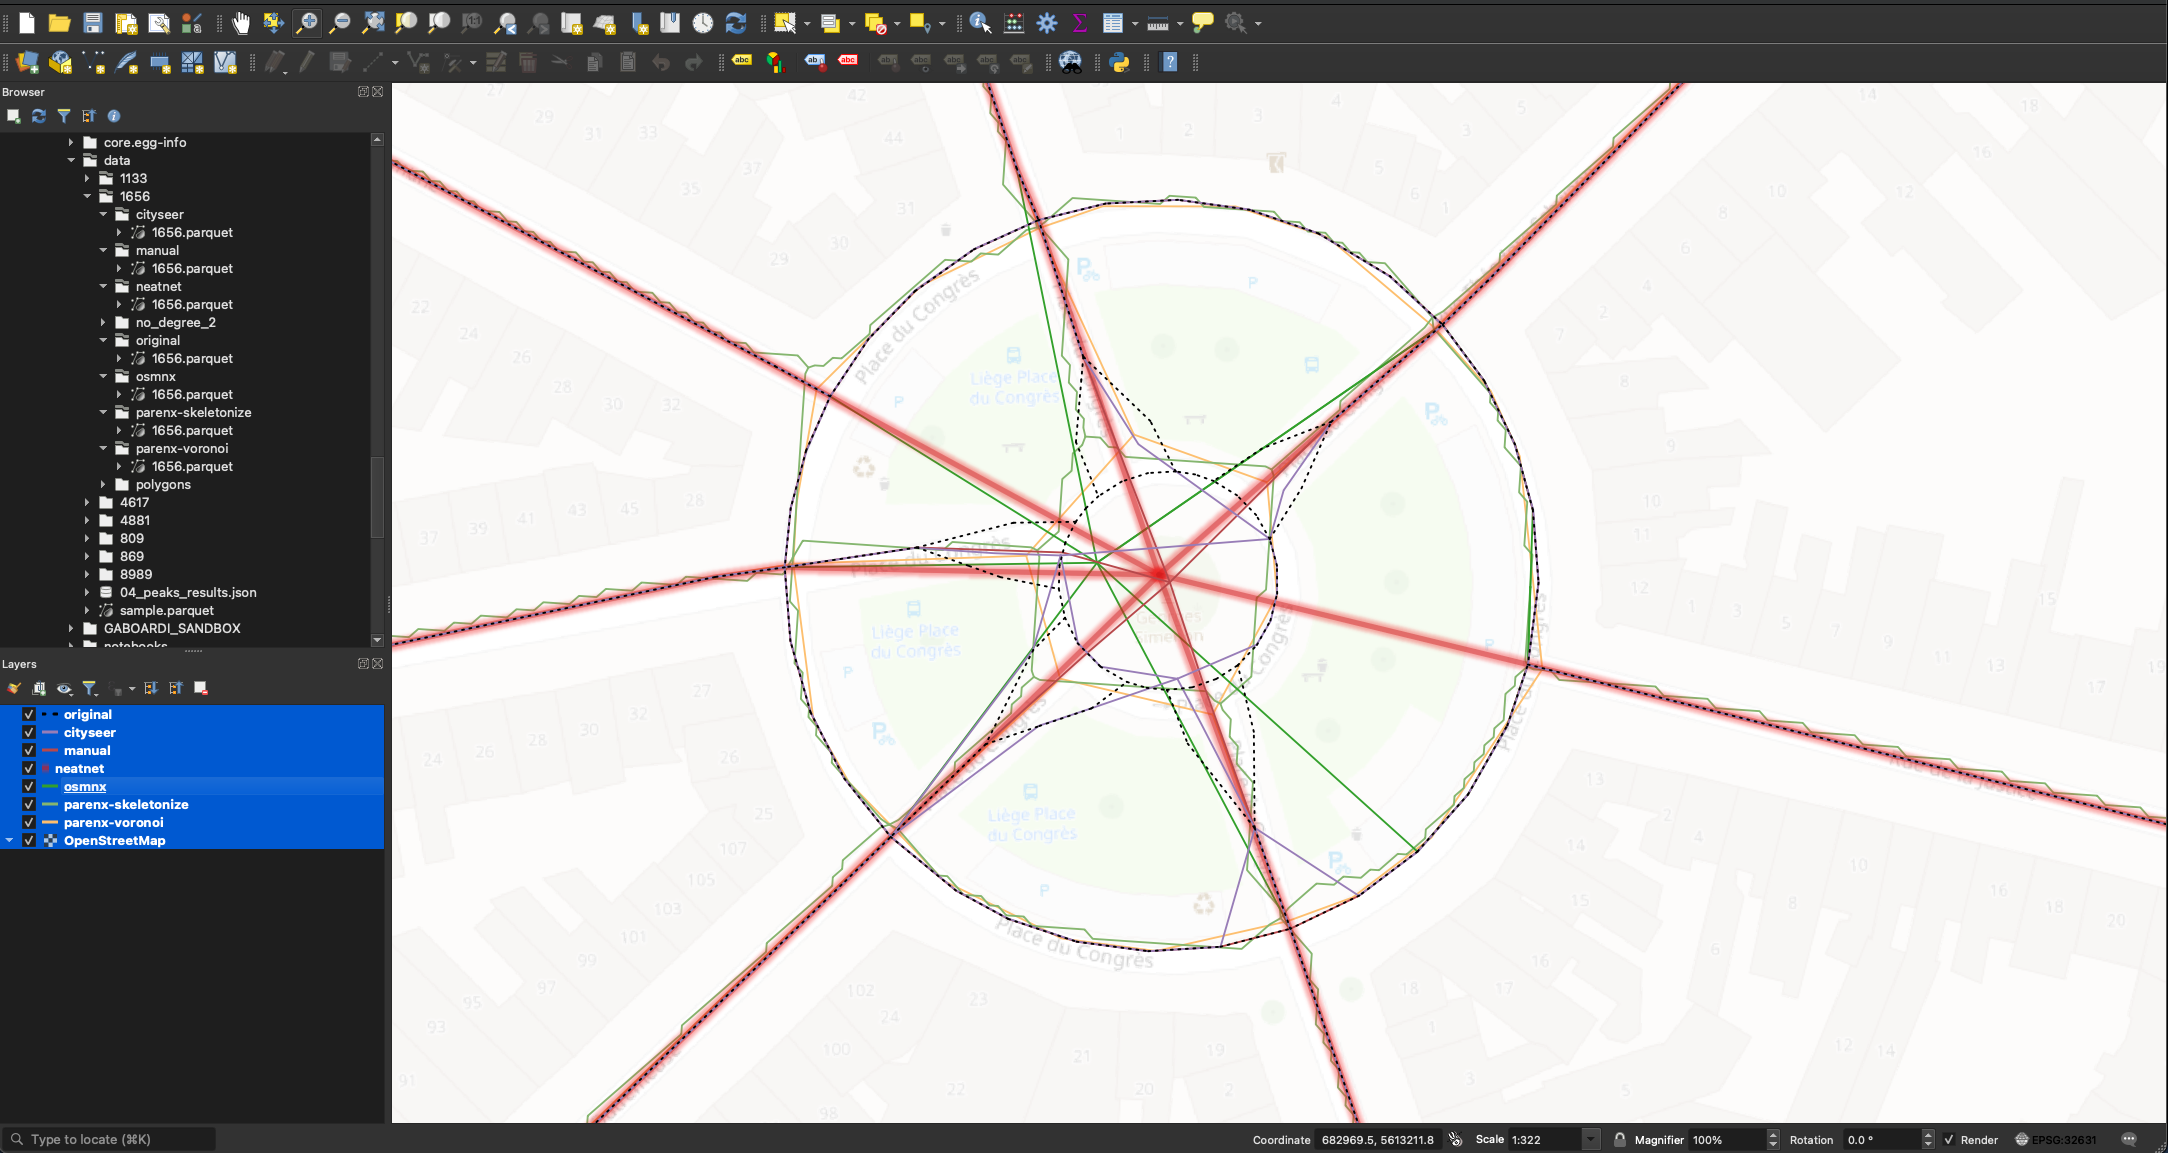
* Discussion by Martin & James
  * > ... 2x3 mosaic where each subplot contains (original & method).
    > ... maybe 3x2
    > ... no base map

---------------------------------

## Locale

* 1656 – Liège, Belgium, Europe
* Place du Congrès
* (5.587859679059068, 50.64200590613313) – EPSG:4326
* (682970.747 5613211.731) – meters
  * Original CRS is a bit wonky
    * ```
      <Projected CRS: {"$schema": "https://proj.org/schemas/v0.7/projjso ...>
      Name: unknown
      Axis Info [cartesian]:
        - E[east]: Easting (metre)
        - N[north]: Northing (metre)
      Area of Use:
        - undefined
      Coordinate Operation:
        - name: UTM zone 31N
        - method: Transverse Mercator
      Datum: World Geodetic System 1984
        - Ellipsoid: WGS 84
        - Prime Meridian: Greenwich
      ```

In [1]:
%config InlineBackend.figure_format = "retina"
%load_ext watermark
%watermark

Last updated: 2025-01-18T21:52:38.823403-05:00

Python implementation: CPython
Python version       : 3.11.11
IPython version      : 8.31.0

Compiler    : Clang 18.1.8 
OS          : Darwin
Release     : 24.2.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



In [2]:
import geopandas
import matplotlib.pyplot as plt
import numpy
import shapely

import core

%watermark -w
%watermark -iv

Watermark: 2.5.0

core      : 0.1.dev124+g2144fe2
shapely   : 2.0.6
matplotlib: 3.10.0
geopandas : 1.0.1
numpy     : 1.26.4



## Original OSM data

In [3]:
original = core.utils.read_original(1656)
original

,geometry
0,"LINESTRING (681808.818 5613496.544, 681809.33 ..."
1,"LINESTRING (681808.593 5613499.564, 681808.818..."
2,"LINESTRING (683965.899 5606423.991, 683962.944..."
3,"LINESTRING (683972.1 5606426.246, 683965.899 5..."
4,"LINESTRING (681462.435 5608137.604, 681459.695..."
...,...
79902,"LINESTRING (686780.173 5618231.643, 686786.038..."
79903,"LINESTRING (677221.12 5610964.423, 677182.58 5..."
79904,"LINESTRING (683956.517 5611148.918, 683982.143..."
79905,"LINESTRING (673549.336 5612362.124, 673552.916..."


## Point of reference

### Place du Congrès, Liège, Belgium

In [4]:
place_du_congress_point = geopandas.GeoDataFrame(
    geometry=[shapely.Point(682970.747, 5613211.731)], crs=original.crs
)
buffer = 50
place_du_congress = place_du_congress_point.buffer(buffer, cap_style="square")
place_du_congress.explore()

### Clip original to Place du Congrès

In [5]:
original_clipped = original.clip(place_du_congress)
original_clipped

,geometry
67009,"LINESTRING (682920.747 5613164.513, 682933.785..."
22094,"LINESTRING (682968.199 5613169.21, 682976.386 ..."
22095,"LINESTRING (682960.065 5613170.284, 682968.199..."
46210,"LINESTRING (682952.294 5613172.873, 682960.065..."
63617,"LINESTRING (682952.294 5613172.873, 682946.371..."
...,...
46528,"LINESTRING (682978.275 5613220.954, 682975.613..."
75965,"LINESTRING (683011.854 5613219.312, 683009.84 ..."
69611,"LINESTRING (682987.506 5613250.685, 682979.719..."
46703,"LINESTRING (682979.719 5613253.363, 682971.568..."


## Plot & save

### 2x3 methods mosaic

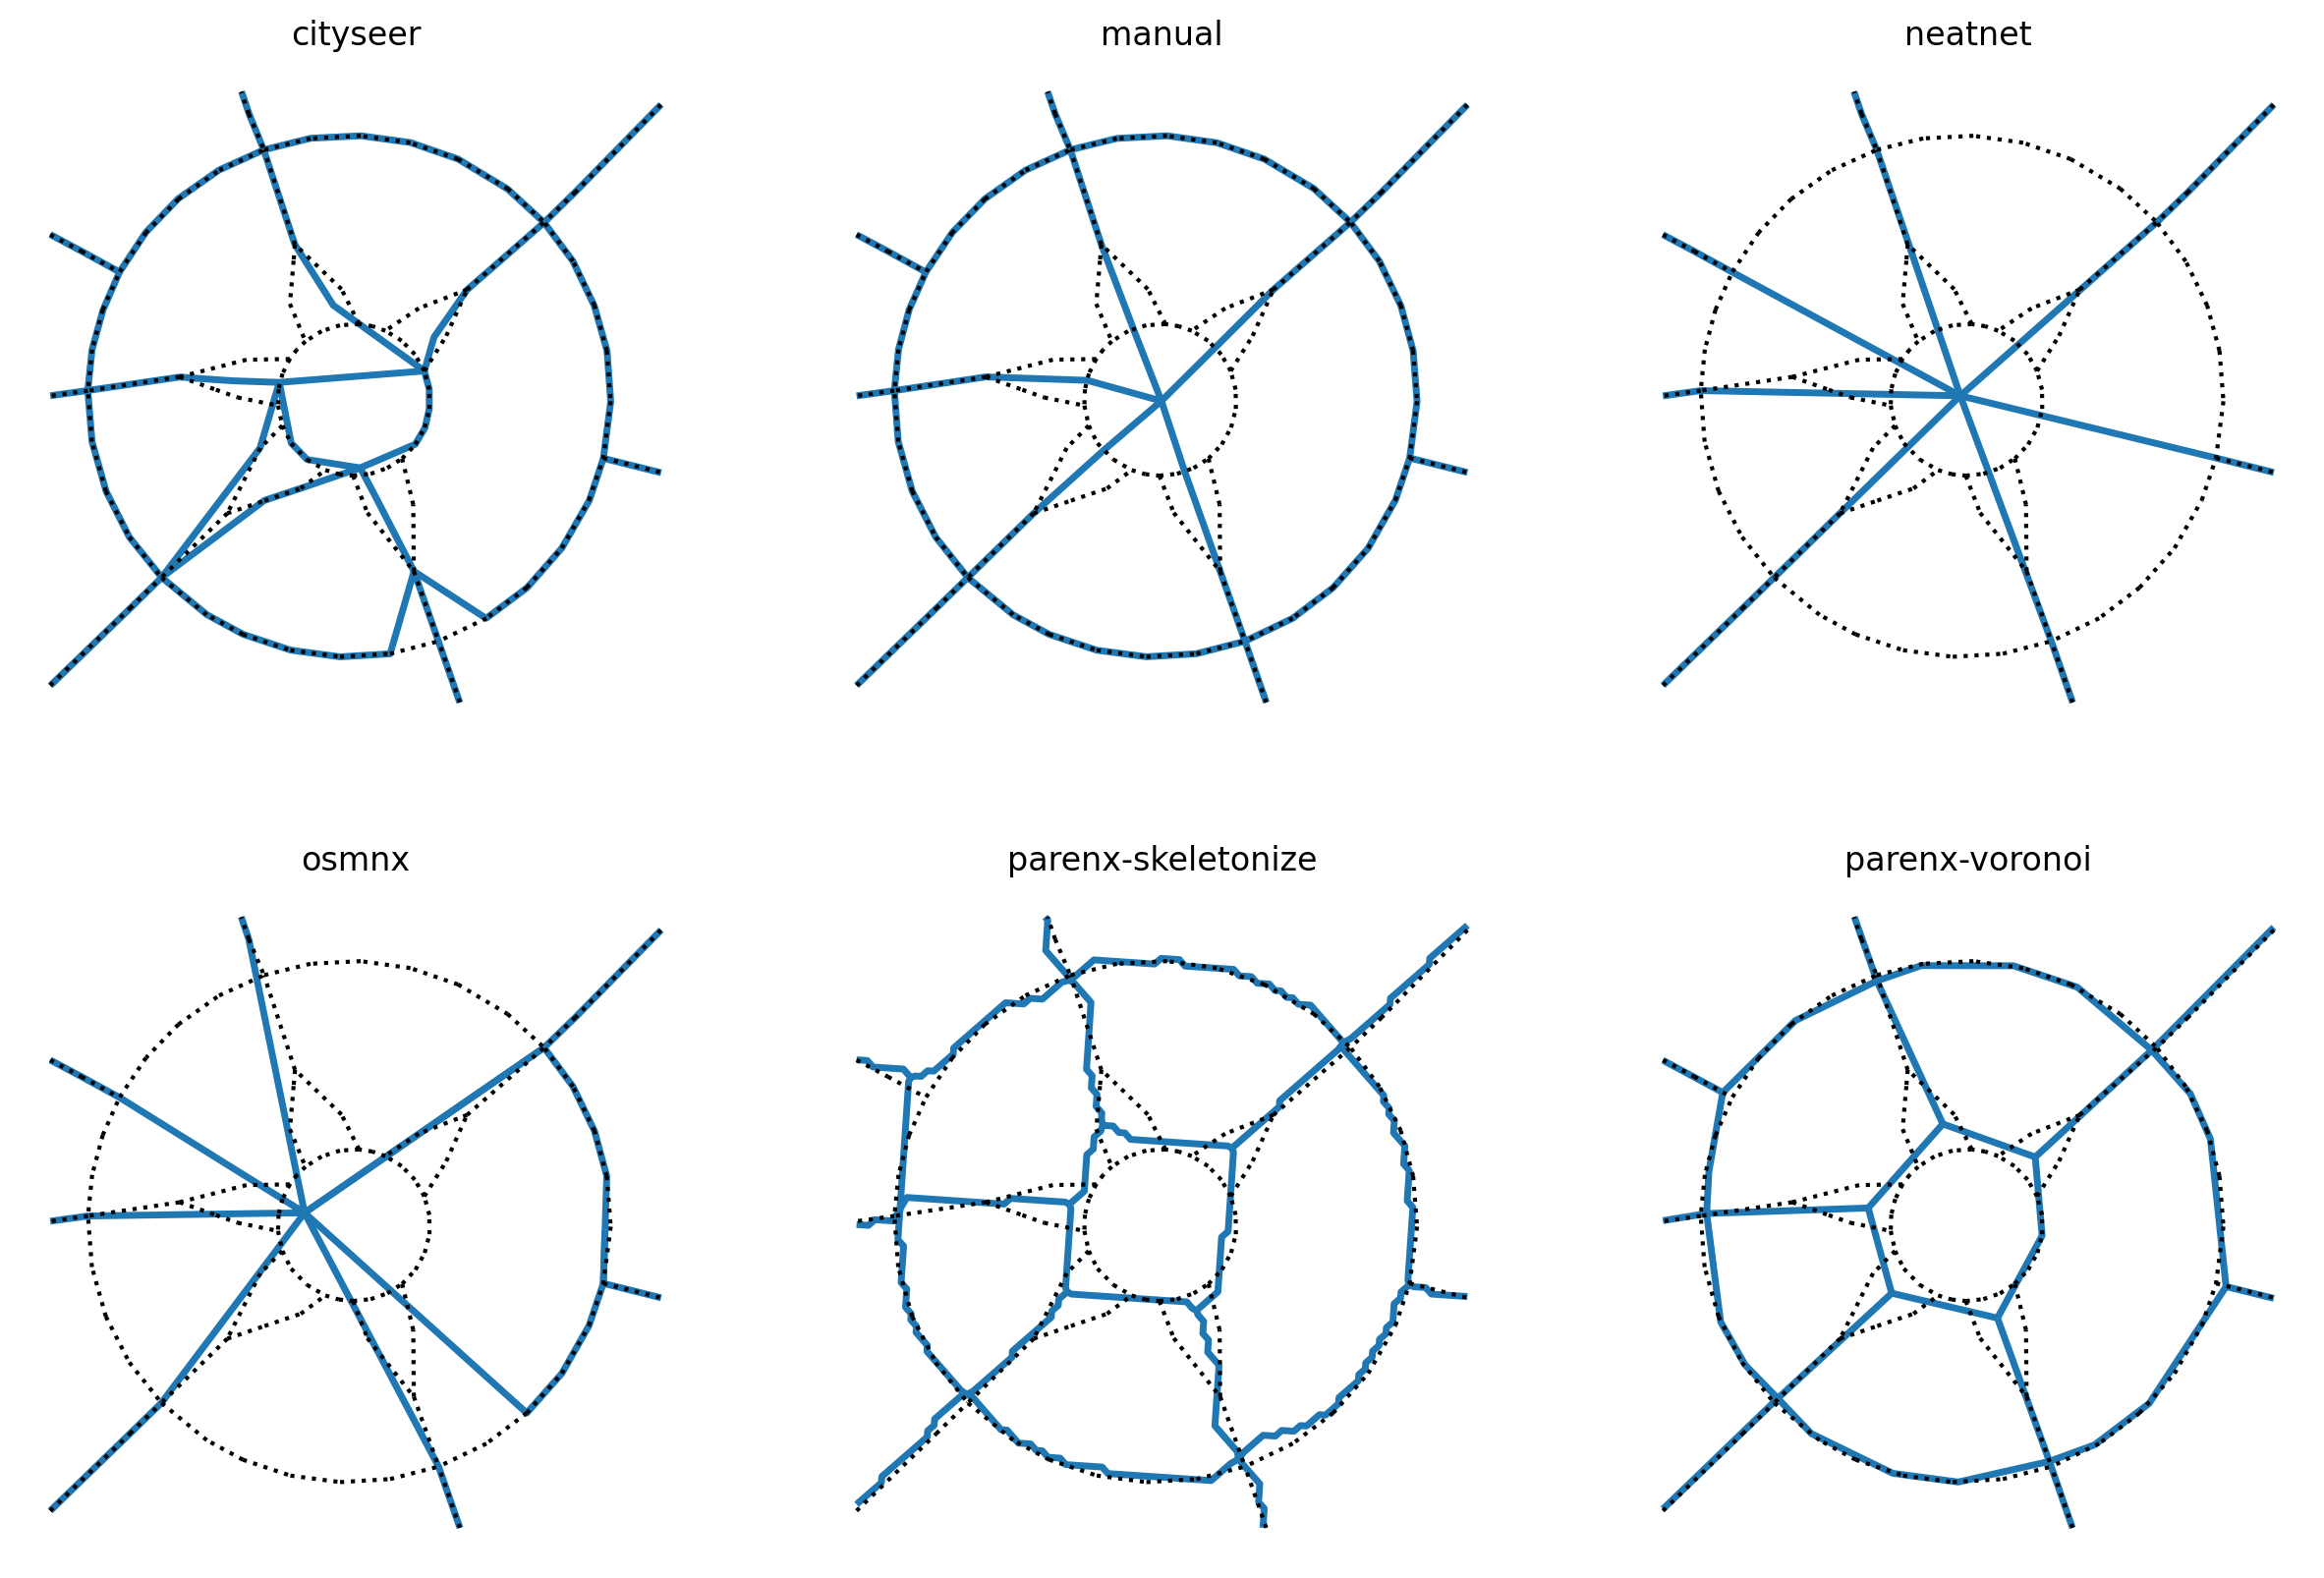

In [6]:
layout = [
    ["cityseer", "manual", "neatnet"],
    ["osmnx", "parenx-skeletonize", "parenx-voronoi"],
]
figsize = (15, 10)

fig, mosaic = plt.subplot_mosaic(
    layout,
    sharex=True,
    sharey=True,
    figsize=figsize,
)

for i in numpy.array(layout).flatten():
    df = core.utils.read_results(1656, i, original.crs).clip(place_du_congress)
    df.plot(ax=mosaic[i], lw=2.5, zorder=1)
    original_clipped.plot(ax=mosaic[i], linestyle=":", lw=1.5, ec="k", zorder=2)
    mosaic[i].set_title(i)
    mosaic[i].axis("off")

# fig.savefig(
#    "gisruk2025_liege_place-du-congres.png",
#    dpi=400,
#    bbox_inches="tight",
# )

### Original + 2x3 methods mosaic

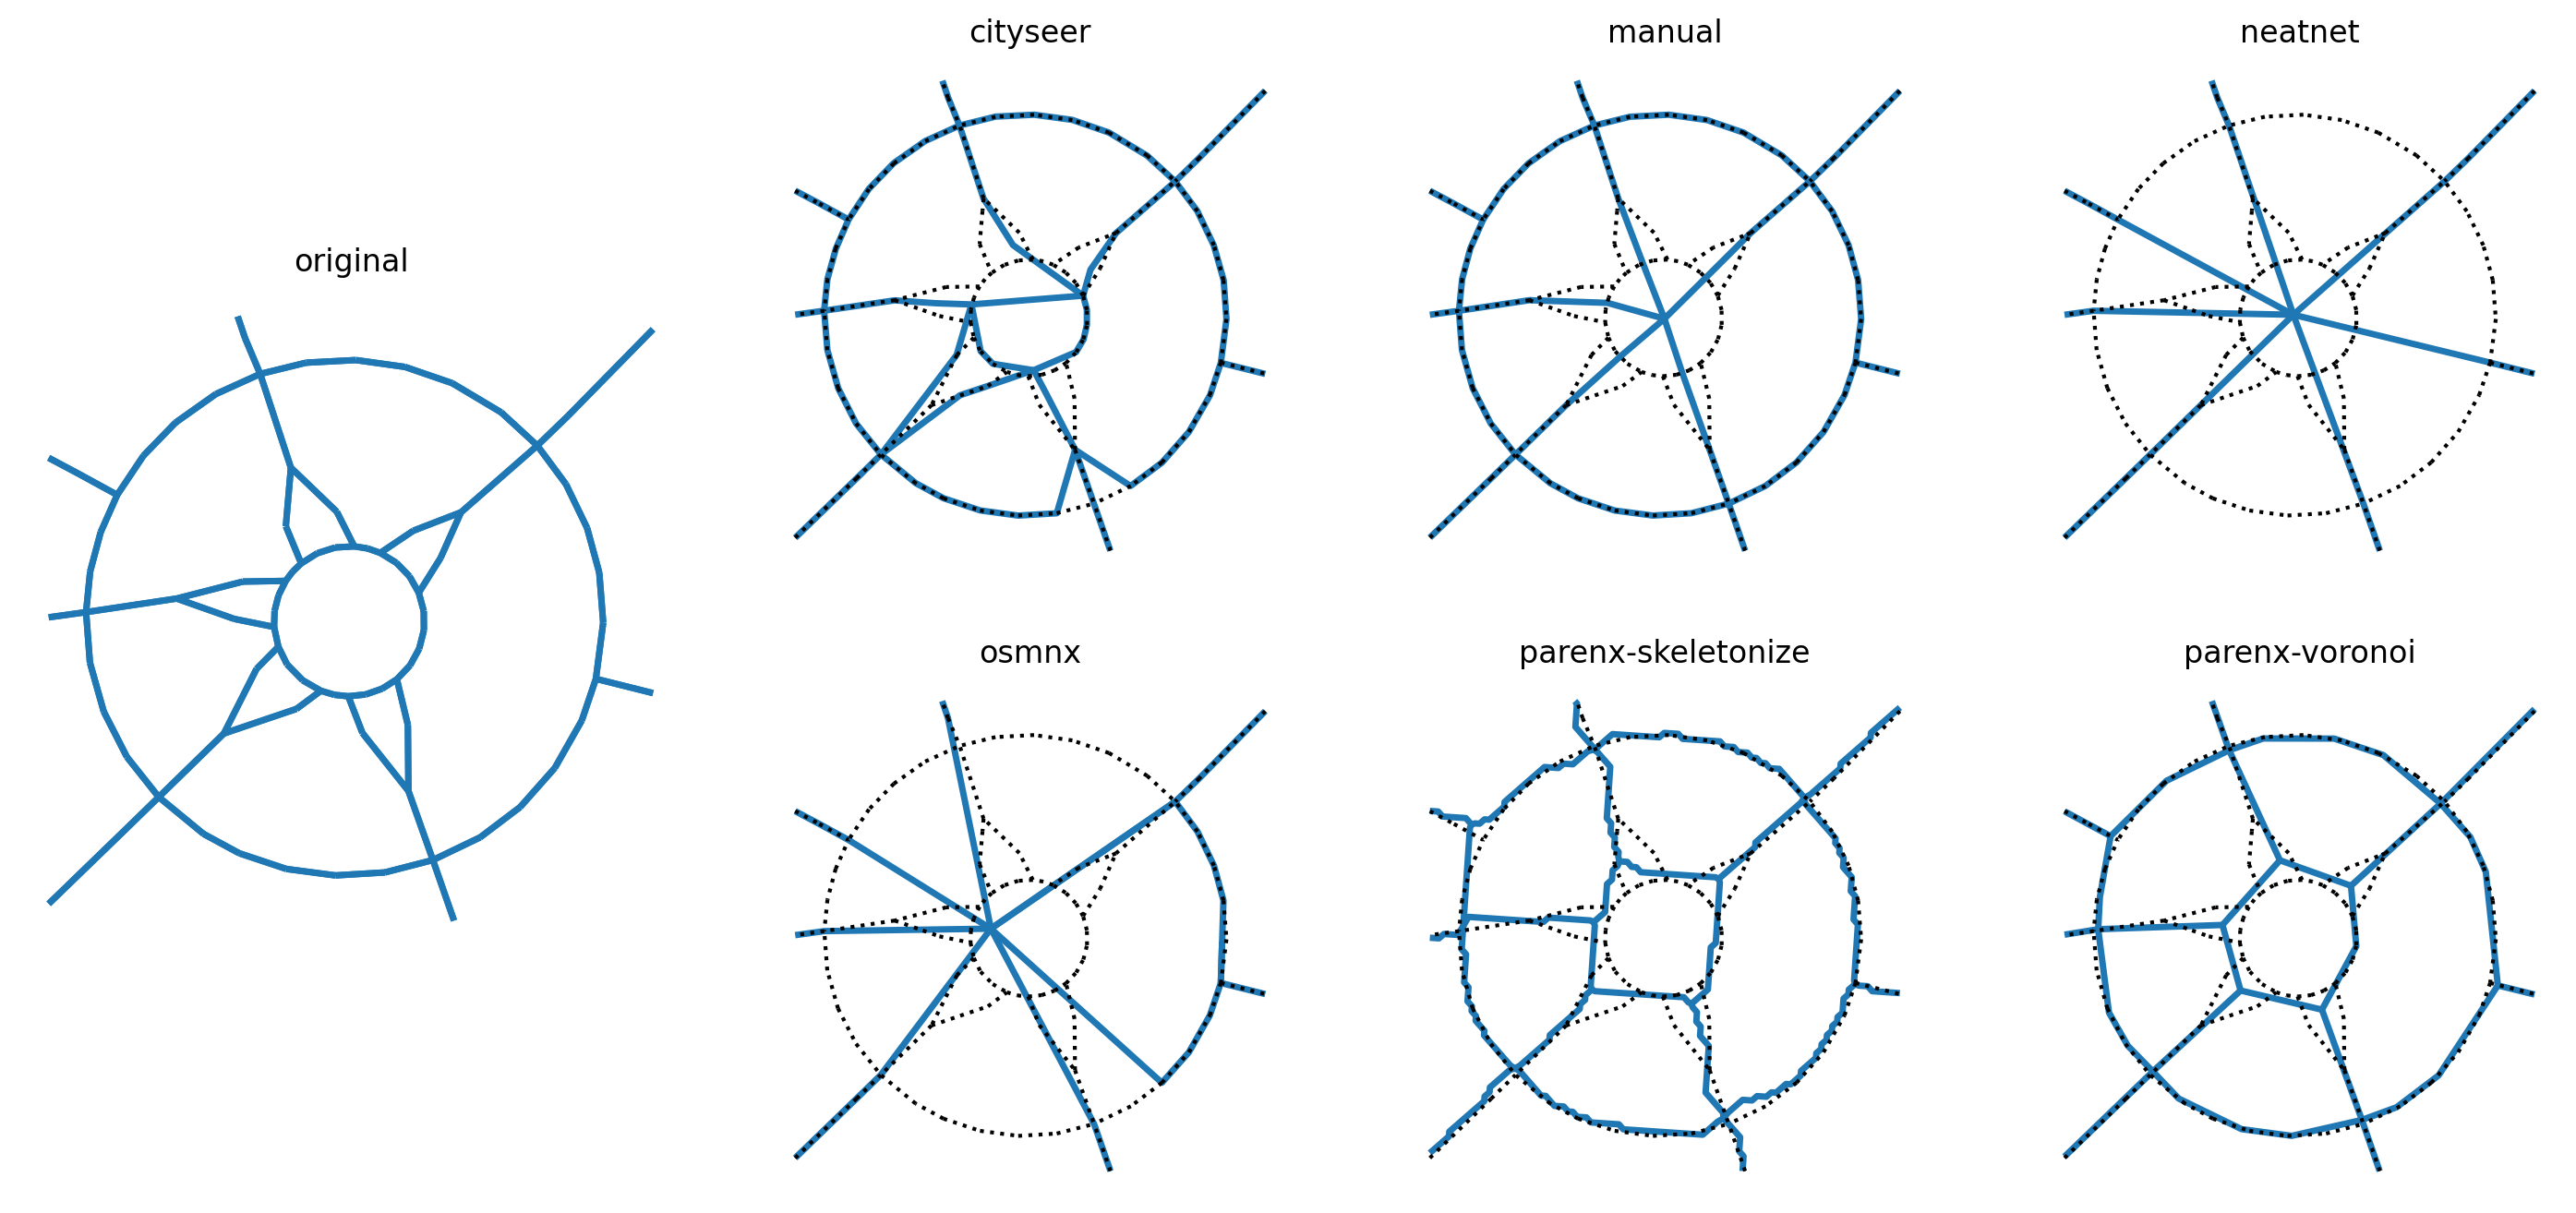

In [7]:
layout = [
    ["original", "cityseer", "manual", "neatnet"],
    ["original", "osmnx", "parenx-skeletonize", "parenx-voronoi"],
]
figsize = (17, 8)

fig, mosaic = plt.subplot_mosaic(
    layout,
    sharex=True,
    sharey=True,
    figsize=figsize,
)

for i in numpy.array(layout).flatten():
    if i == "original":
        df = original_clipped
        mosaic[i].set_position([-0.03, 0.275, 0.45, 0.45])
    else:
        df = core.utils.read_results(1656, i, original.crs).clip(place_du_congress)
        original_clipped.plot(ax=mosaic[i], linestyle=":", lw=1.5, ec="k", zorder=2)
    df.plot(ax=mosaic[i], lw=2.5, zorder=1)
    mosaic[i].set_title(i)
    mosaic[i].axis("off")

fig.savefig(
    "gisruk2025_liege_place-du-congres.png",
    dpi=400,
    bbox_inches="tight",
)

------------------------